In [1]:
!git clone https://github.com/ultralytics/yolov5.git  # clone repo
%cd yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.
/home/isllab/Desktop/sanjoy/ml-end-end/yolov5/yolov5


In [2]:
!pip install -r requirements.txt

In [3]:
%cd ..

/home/isllab/Desktop/sanjoy/ml-end-end/yolov5


In [4]:
%cat data.yaml

train: ../train/images
val: ../test/images

nc: 1
names: ['o']


In [5]:
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [6]:
num_classes

'1'

In [7]:
%cat yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 

In [8]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [9]:
%%writetemplate yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [23]:
%%time
%cd yolov5/
!python train.py --img 416 --batch 16 --epochs 50 --data '../data.yaml' --cfg ./models/custom_yolov5s.yaml --weights 'yolov5s.pt' --name yolov5s_results  --cache

[Errno 2] No such file or directory: 'yolov5/'
/home/isllab/Desktop/sanjoy/ml-end-end/yolov5/yolov5
2024-01-30 19:38:06.052407: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-30 19:38:06.052453: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-30 19:38:06.053573: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=./models/custom_yolov5s.yaml, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_popu

train: Caching images (0.1GB ram): 100%|██████████| 365/365 [00:00<00:00, 831.44
val: Scanning /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/labels.cache...
val: WARNING ⚠️ /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/images/004_HC.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0333]
val: WARNING ⚠️ /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/images/012_HC.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0111]
val: WARNING ⚠️ /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/images/022_HC.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1611]
val: WARNING ⚠️ /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/images/025_HC.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.2148]
val: WARNING ⚠️ /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/images/031_HC.png: ignoring corrupt image/label: non-normalized or out of b


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       8/49         0G    0.04936    0.02704          0         31        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        153        153       0.21      0.359      0.176     0.0454

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
       9/49         0G    0.04957    0.02692          0         41        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        153        153      0.184      0.379      0.183     0.0459

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      10/49         0G    0.04957    0.02648          0         35        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        153        153      0.195      0.366      0.181     0.0467

      Epo


      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      33/49         0G    0.03653    0.02212          0         36        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        153        153      0.315      0.235      0.229     0.0771

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      34/49         0G    0.03457    0.02257          0         32        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        153        153      0.288      0.255      0.234     0.0804

      Epoch    GPU_mem   box_loss   obj_loss   cls_loss  Instances       Size
      35/49         0G    0.03499    0.02192          0         31        416: 1
                 Class     Images  Instances          P          R      mAP50   
                   all        153        153      0.246      0.345       0.22     0.0704

      Epo

In [24]:
from IPython.display import Image


In [26]:
!pip install tensorboard

In [31]:
import os
os.getcwd()

'/home/isllab/Desktop/sanjoy/ml-end-end/yolov5/yolov5'

In [36]:
#!tensorboard --logdir /runs

GROUND TRUTH TRAINING DATA:


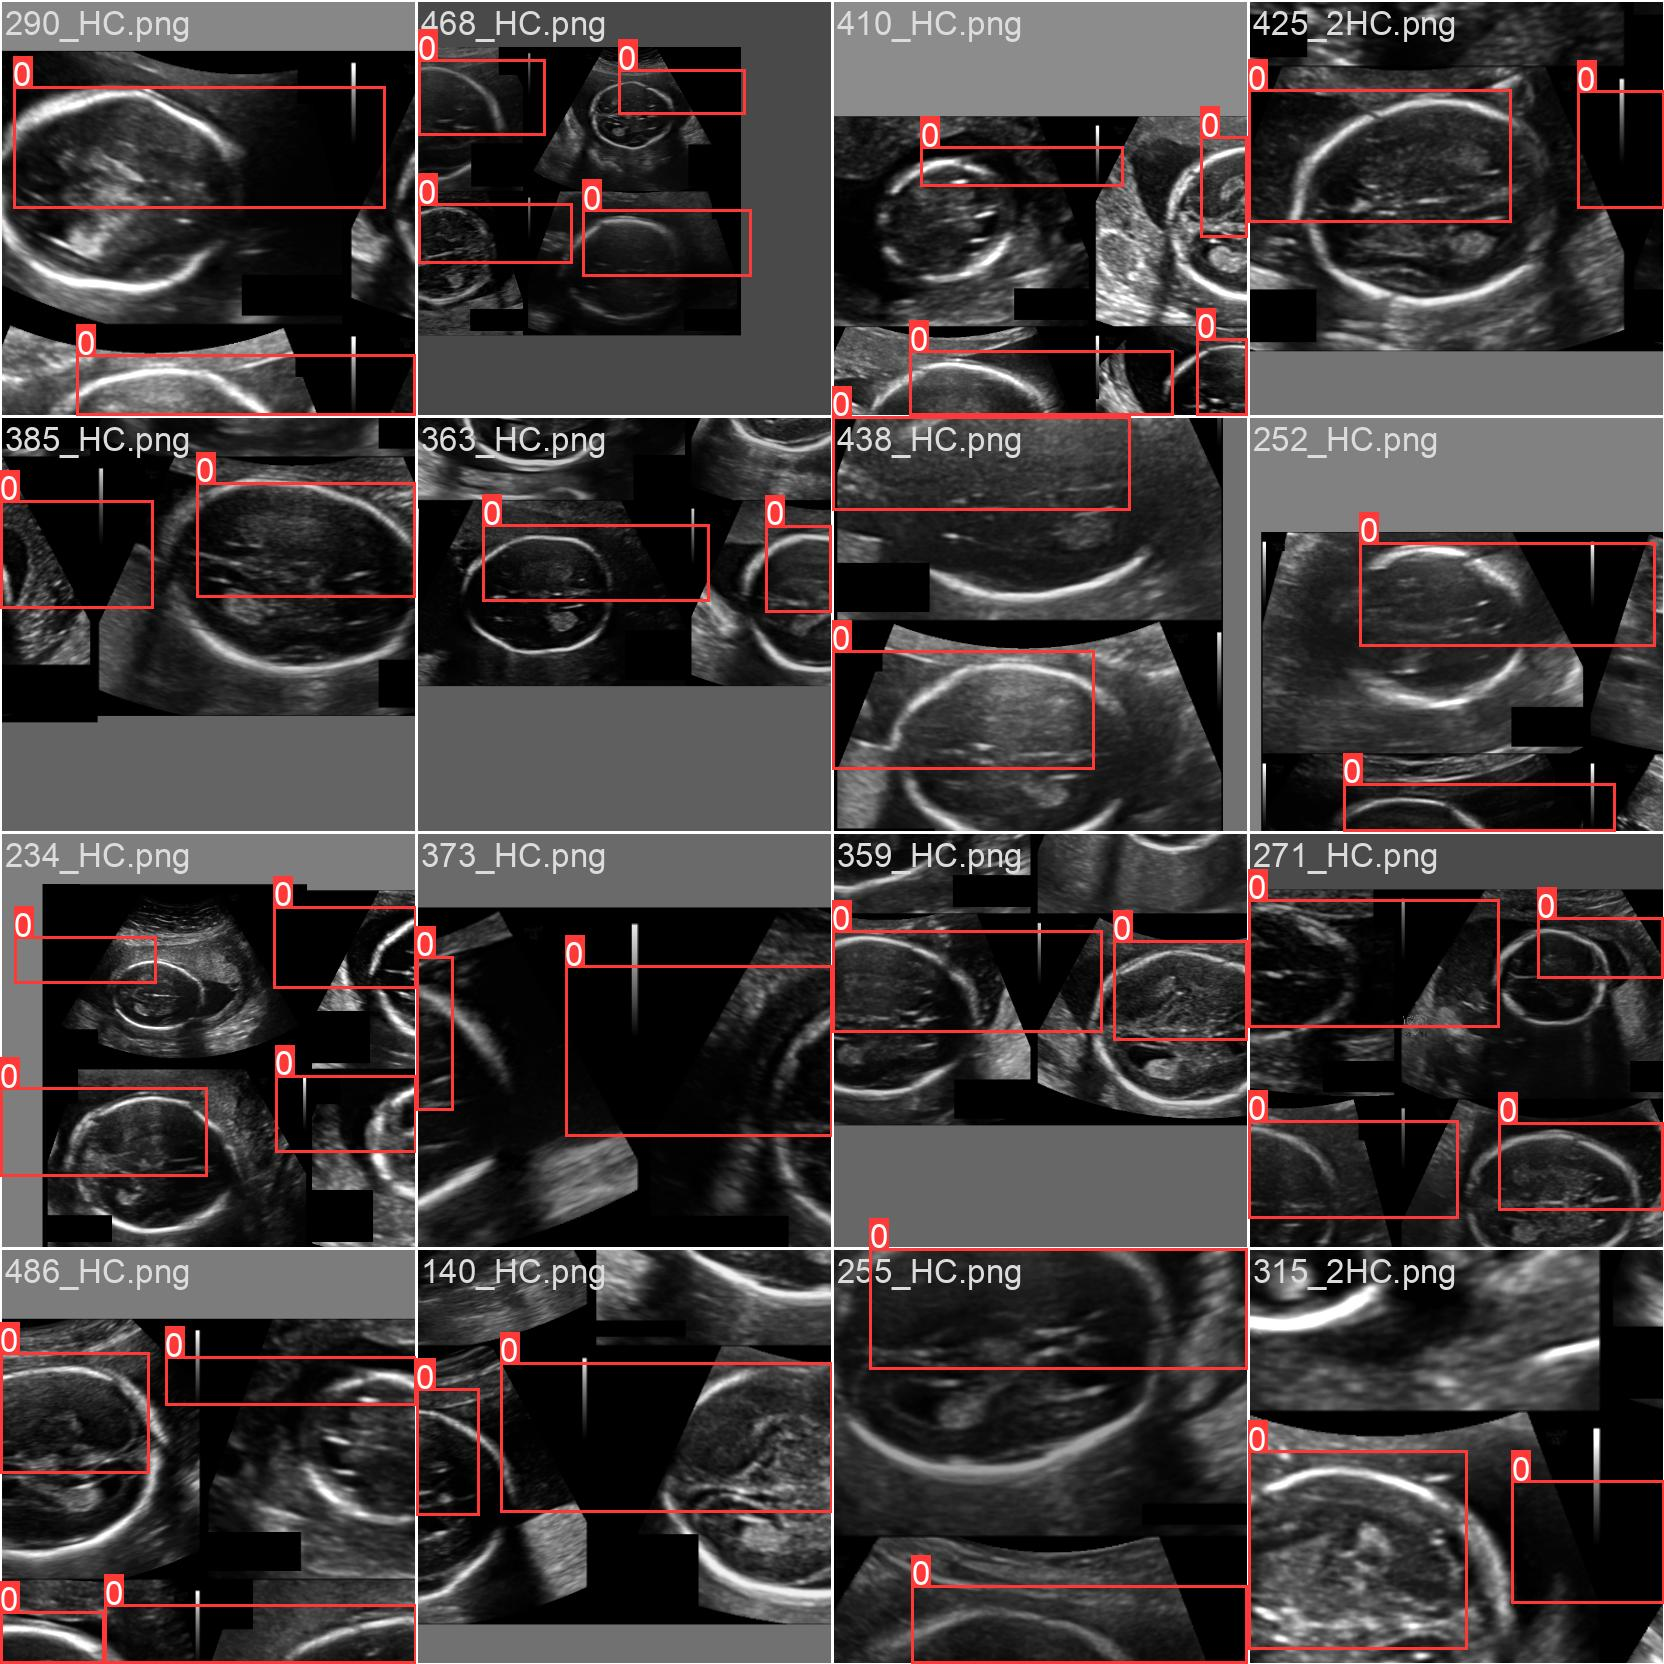

In [46]:
print("GROUND TRUTH TRAINING DATA:")
Image(filename='runs/train/yolov5s_results3/train_batch0.jpg', width=900)

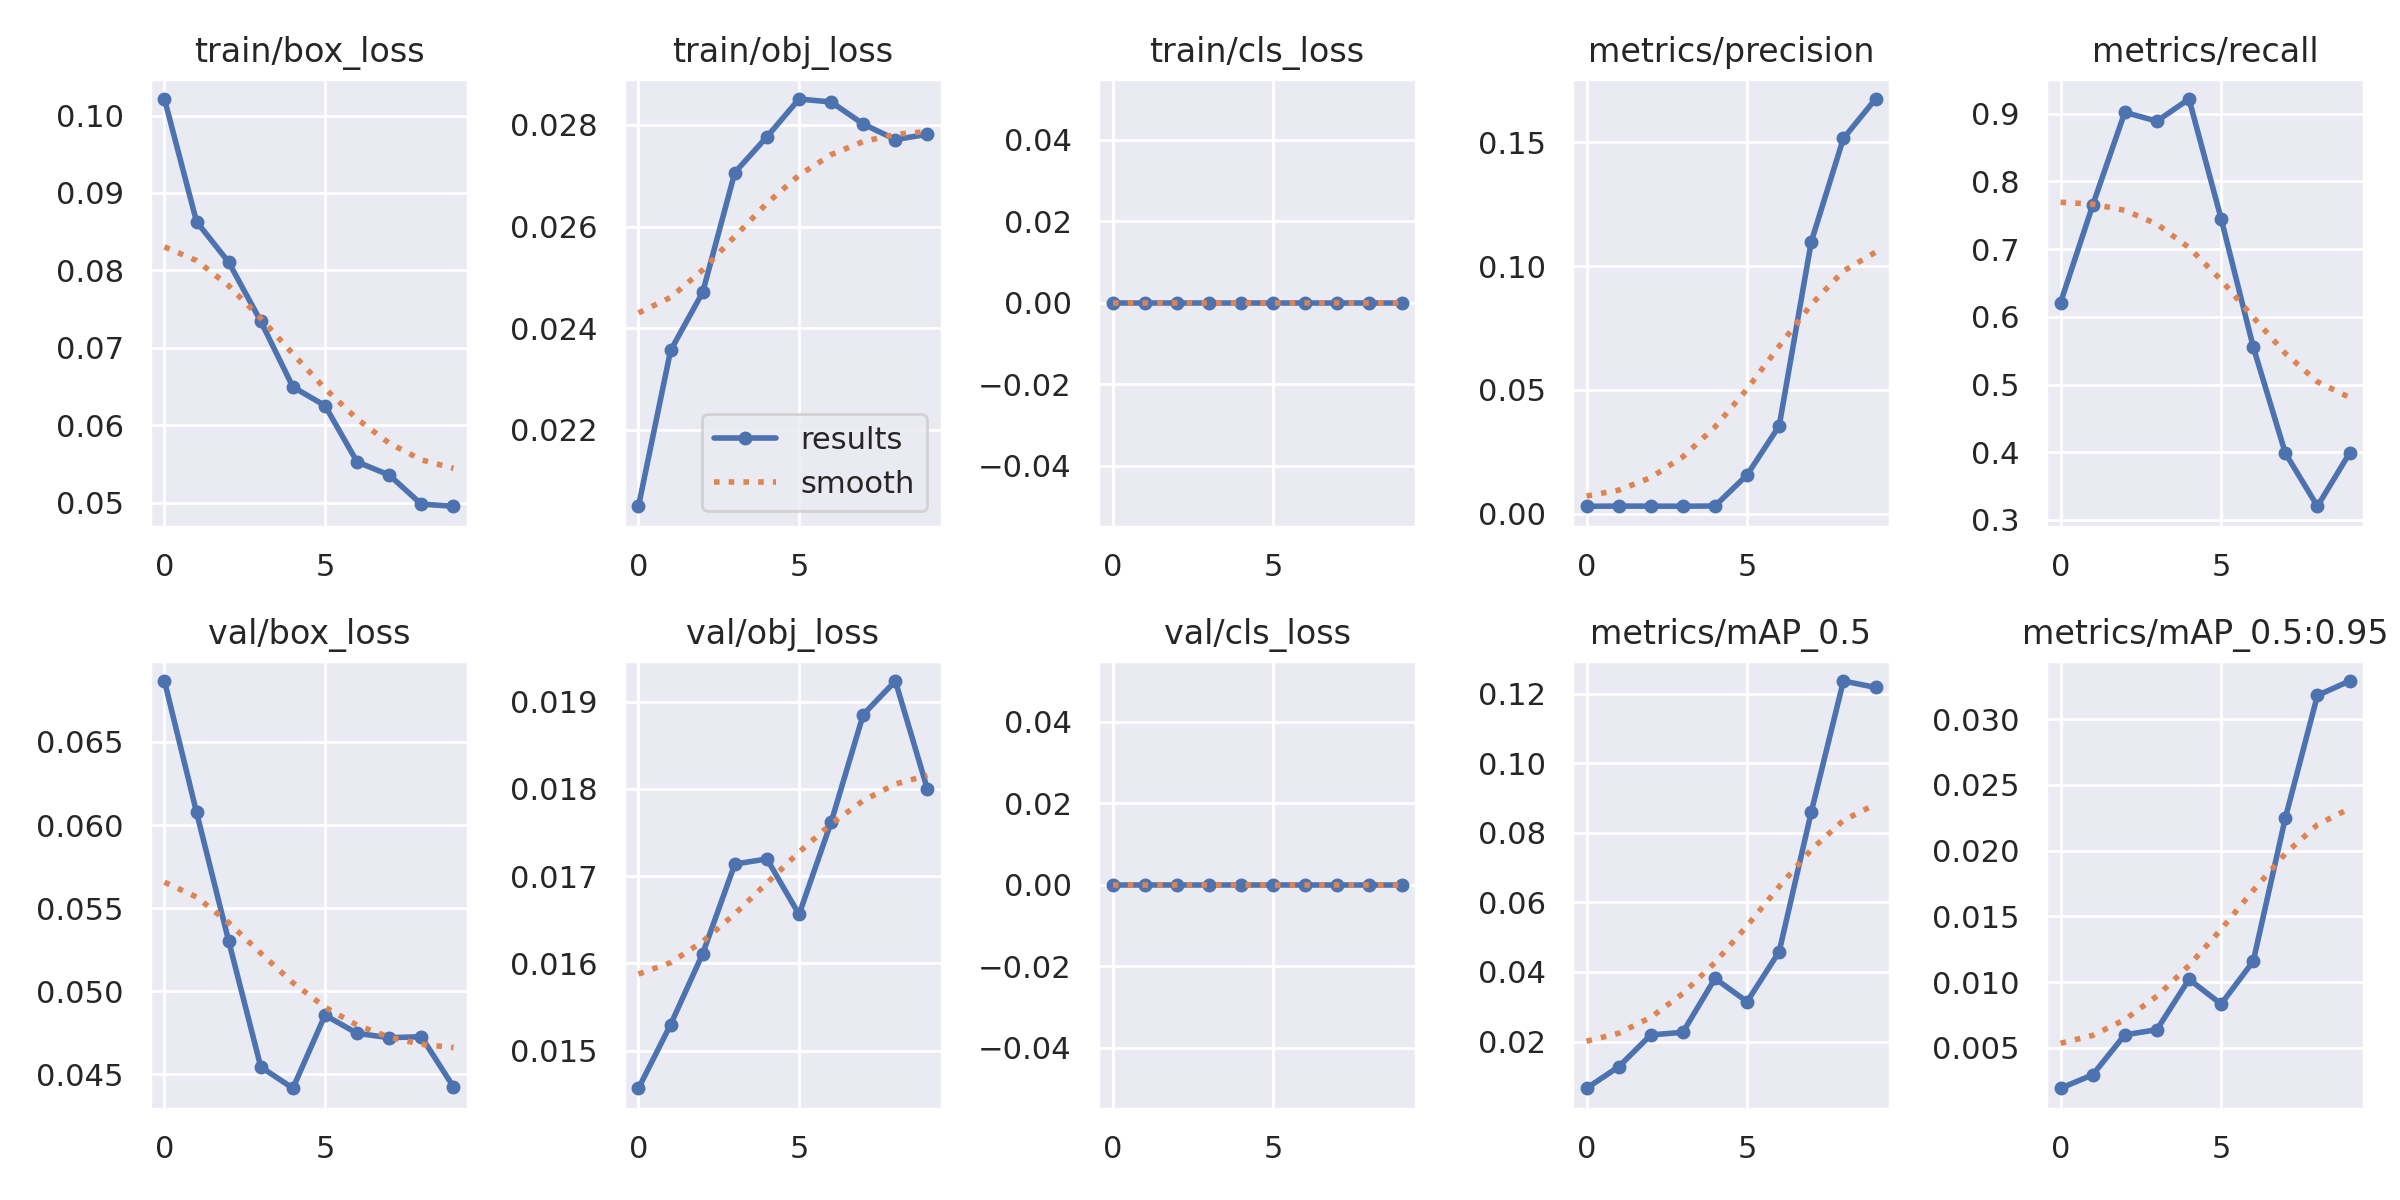

In [56]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='runs/train/yolov5s_results2/results.png', width=1000)

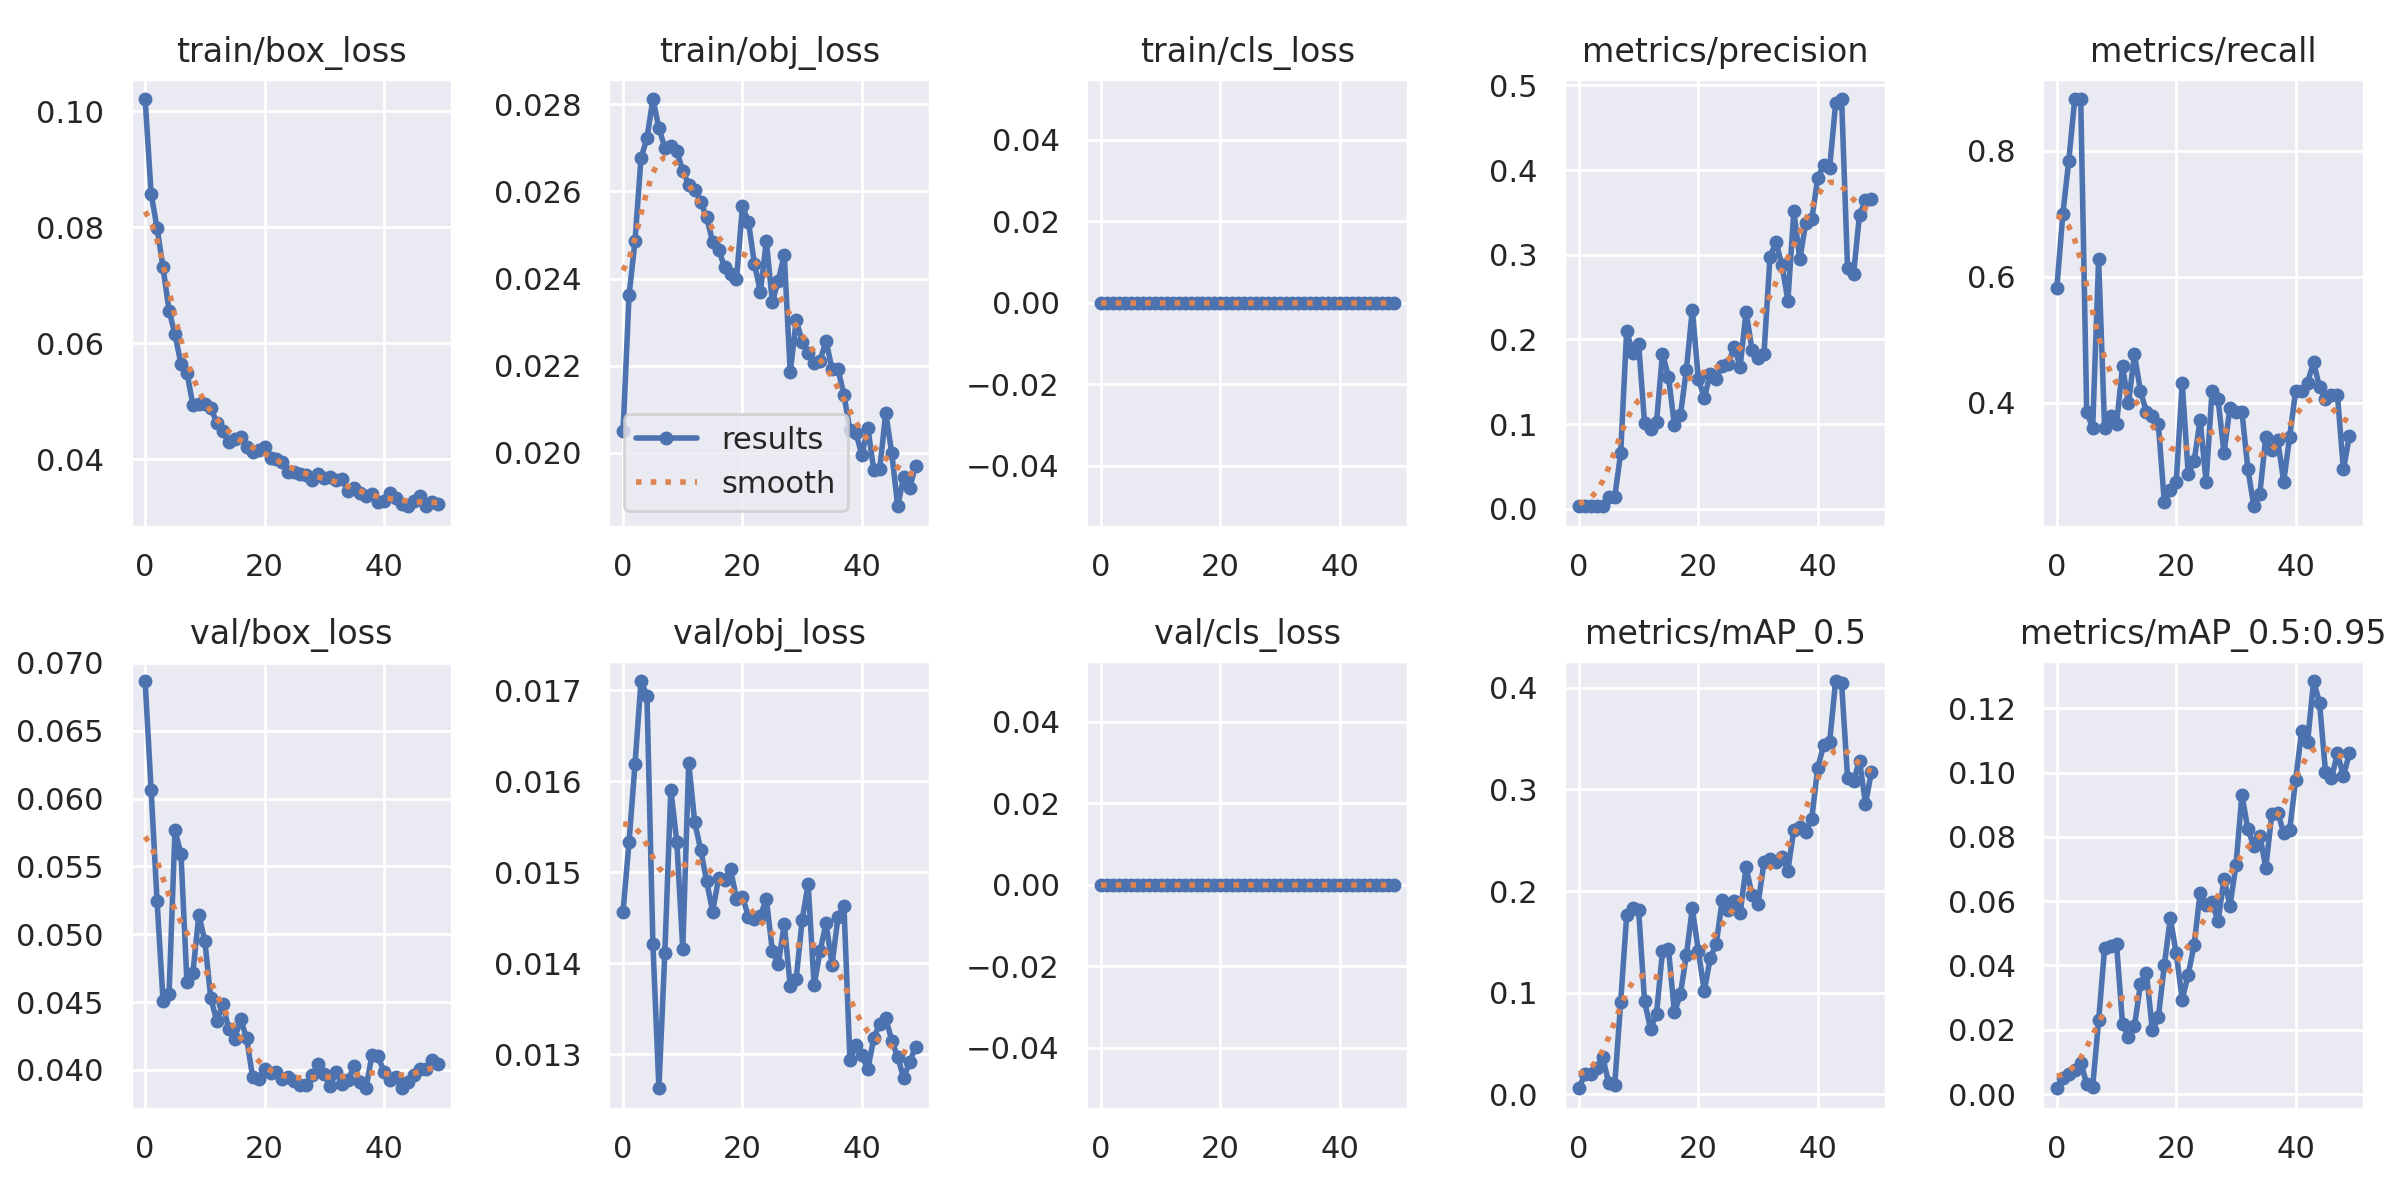

In [44]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='runs/train/yolov5s_results3/results.png', width=1000)  # view results.png

Prediction Result of validation set:


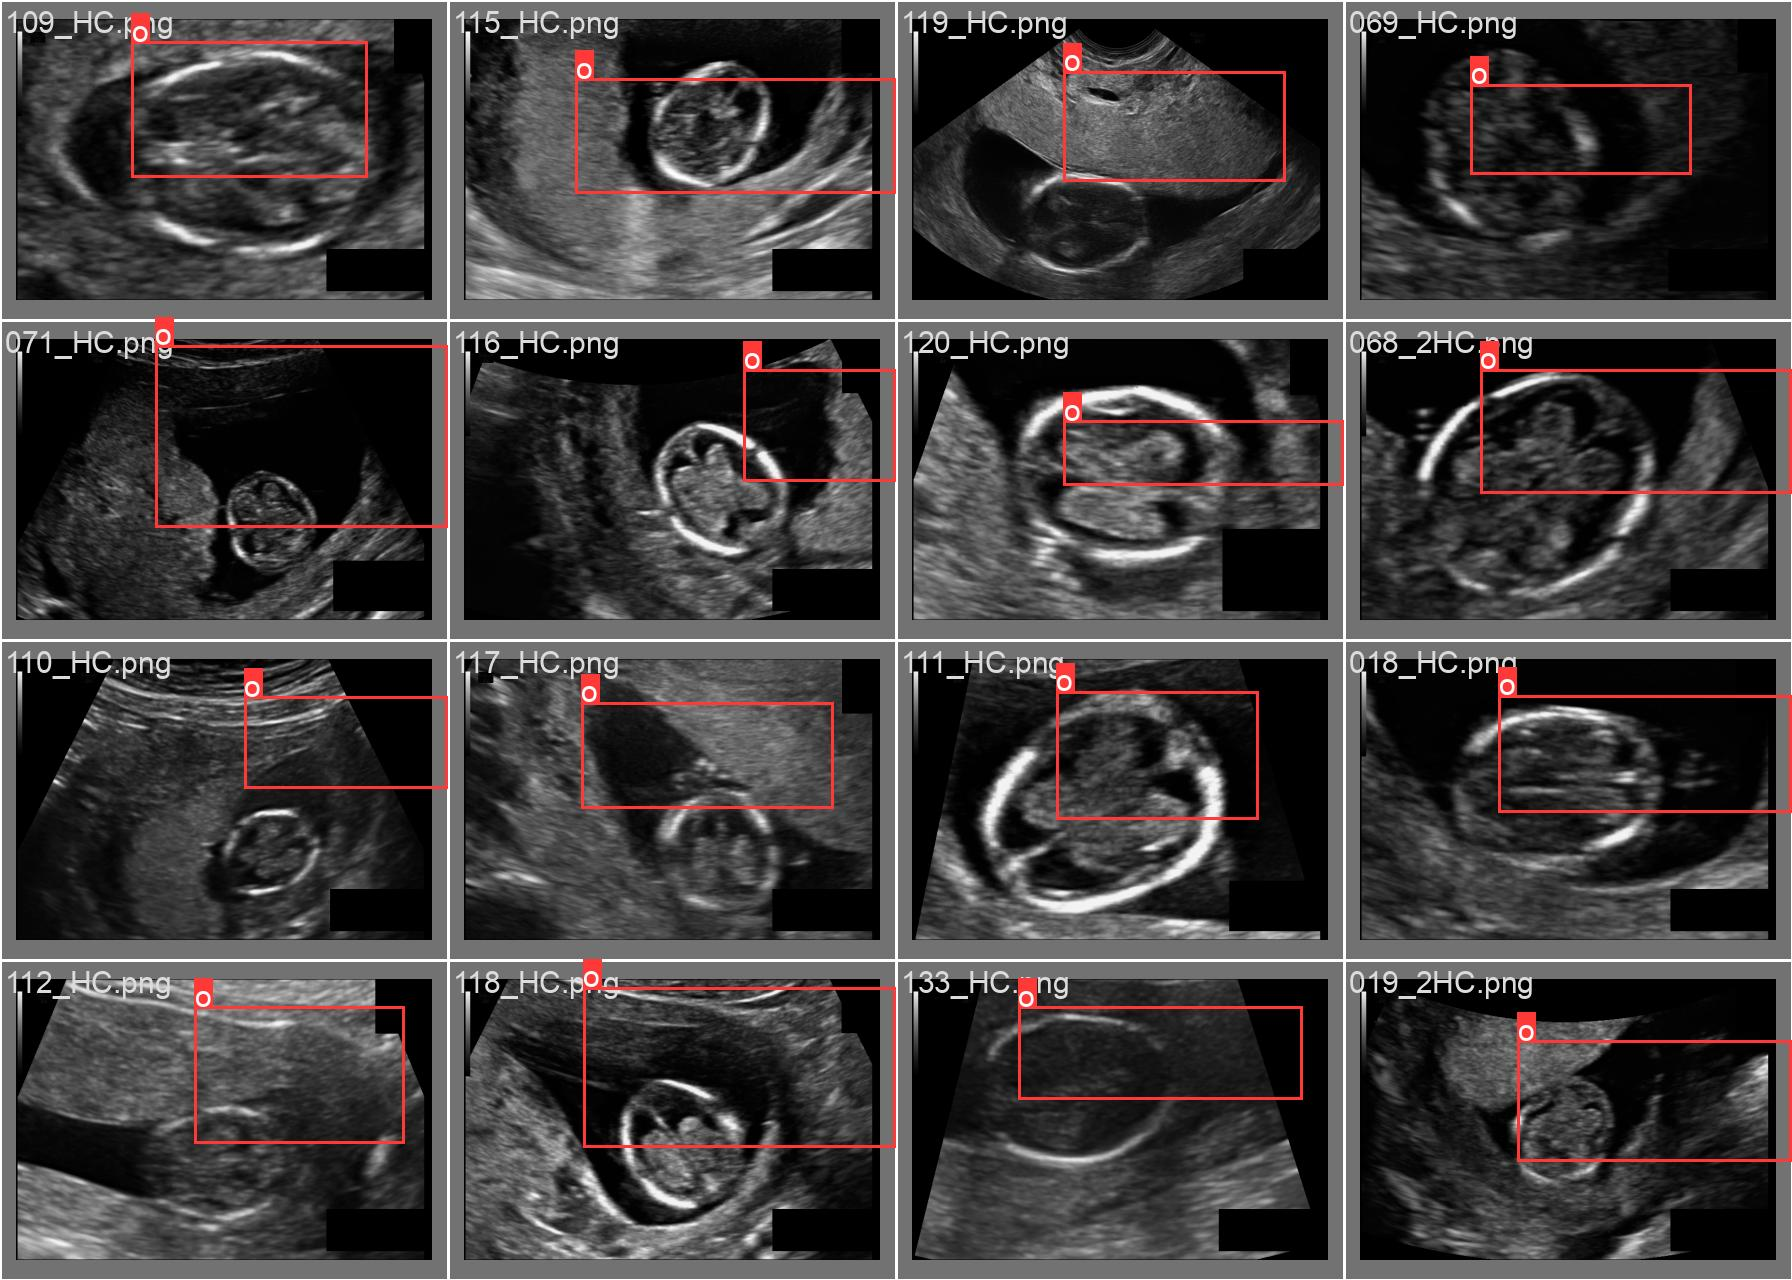

In [55]:
print("Prediction Result of test set:")
Image(filename='runs/train/yolov5s_results3/val_batch2_labels.jpg', width=900)

In [47]:
%ls runs/train/yolov5s_results/weights

best.pt  last.pt


In [48]:
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.1 --source ../test/images

detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=../test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-282-g9cdbd1de Python-3.9.12 torch-2.1.2+cu121 CPU

Fusing layers... 
custom_YOLOv5s summary: 182 layers, 7246518 parameters, 0 gradients
image 1/170 /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/images/000_HC.png: 288x416 (no detections), 159.1ms
image 2/170 /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/images/001_HC.png: 288x416 (no detections), 139.4ms
image 3/170 /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/images/002_HC.png: 288x416 (no detections), 125.0ms
image 4

image 67/170 /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/images/055_HC.png: 288x416 (no detections), 94.8ms
image 68/170 /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/images/056_HC.png: 288x416 (no detections), 87.2ms
image 69/170 /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/images/057_HC.png: 288x416 (no detections), 84.6ms
image 70/170 /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/images/058_HC.png: 288x416 (no detections), 89.7ms
image 71/170 /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/images/059_HC.png: 288x416 (no detections), 83.8ms
image 72/170 /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/images/060_HC.png: 288x416 (no detections), 84.3ms
image 73/170 /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/images/061_2HC.png: 288x416 (no detections), 134.7ms
image 74/170 /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/images/061_HC.png: 288x416 (no detections), 133.6ms
image 75/170 /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/images/062_HC

image 138/170 /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/images/111_HC.png: 288x416 (no detections), 88.2ms
image 139/170 /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/images/112_HC.png: 288x416 (no detections), 94.1ms
image 140/170 /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/images/113_HC.png: 288x416 (no detections), 84.1ms
image 141/170 /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/images/114_HC.png: 288x416 (no detections), 82.6ms
image 142/170 /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/images/115_HC.png: 288x416 (no detections), 85.8ms
image 143/170 /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/images/116_HC.png: 288x416 (no detections), 83.5ms
image 144/170 /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/images/117_HC.png: 288x416 (no detections), 88.5ms
image 145/170 /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/images/118_HC.png: 288x416 (no detections), 84.1ms
image 146/170 /home/isllab/Desktop/sanjoy/ml-end-end/yolov5/test/images/